In [2]:
import ipywidgets as w
import ipywidgets_runner as wr
import sympy as sp
import time
import matplotlib.pyplot as plt

%matplotlib widget

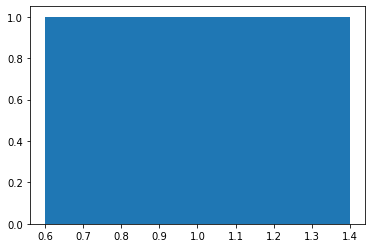

In [3]:
plt.ioff()

ax = plt.gca()
plt.bar([1],[1]);
display(ax.figure)

In [4]:
ax = plt.gca()
plt.bar([1,2,3],[3,4,5]);
plt.xticks([1,2,3],("a","b","c"));

output_widget = w.Output()
container_widget = w.VBox([output_widget], layout=w.Layout(border="solid black 3px"))
with output_widget:
    display(ax.figure)
    
display(container_widget)

In [ ]:
%%html
<img src="overview.svg" />

---

In [ ]:
def parse_expression(exp):
    try:
        number = int(sp.sympify(exp))
    except:
        number = 1
    return number

def find_primes(number):
    return sp.factorint(number)

def plot_primes(number, primesdict):
    # grab current axes
    ax = plt.gca()
    # make a bar graph
    factors = sorted(list(primesdict.keys()))
    try:
        plt.clf()
    except:
        pass
    ax.set_title("Factors of " + str(number))
    plt.bar(range(len(factors)),[primesdict[factor] for factor in factors])
    plt.xticks(range(len(factors)),(str(factor) for factor in factors), rotation=45)
    return ax.figure

In [ ]:
expression_widget = w.Text()

prime_decomposition_widget = w.Output()

parse_node = wr.Node(
    args=[expression_widget],
    f=parse_expression
)

factor_node = wr.Node(
    args=[parse_node],
    f=find_primes
)

third_node = wr.Node(
    args=[parse_node, factor_node],
    f=plot_primes,
    display_widget=prime_decomposition_widget
)

container_widget = w.VBox([expression_widget, prime_decomposition_widget])

wr.display(container_widget, debug=True)